<a href="https://colab.research.google.com/github/mckang6113875/AP_Test_OPEN/blob/main/Temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
# 6113875

In [ ]:
! pip install tensorflow-graphics

# Undistorted Points - Iterative

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def grid_2d(row, col):
    pts = np.zeros([2, row * col])
    cx, cy = (col - 1) * .5, (row - 1) * .5
    for i in range(row * col):
        pts[:, i] = i % col - cx, i // col - cy
    # pts in interval [-1,1]
    return pts / pts.max()

def apply_distortion(pts, k1, k2):
    r2 = np.square(pts).sum(0)
    f = 1 + k1 * r2 + k2 * r2**2
    return pts * f

def remove_distortion(pts, k1, k2):
    # as described in the paper
    b1, b2 = -k1, 3 * k1**2 - k2
    return apply_distortion(pts, b1, b2)

def remove_distortion_iter(points, k1, k2):
    # as used in e.g. matlab calibration tookit
    pts = ptsd = points
    for _ in range(5):
        r2 = np.square(pts).sum(0)
        f = 1 + k1 * r2 + k2 * r2**2
        pts = ptsd / f
    return pts

def plot_compare(ax, a, b, arrow=True):
    ax.scatter(*b, marker='x', c='b')
    ax.scatter(*a, marker='x', c='g')
    error = np.sqrt(np.square(a-b).sum(0).max())
    print('error: {:0.2f}'.format(error))
    if not arrow:
        return
    for (x, y), (bx, by) in zip(a.T, b.T):
        ax.plot([x, bx], [y, by], color='r', lw=0.5)

k1, k2 = 0.05, 0.01

pts = grid_2d(15, 15)
fig, ax = plt.subplots(1, figsize=[6,6])
ax.axis('equal')
ax.set_title('Grid of Points')
ax.scatter(*pts, marker='x', c='g');

d = apply_distortion(pts, k1, k2)
a, b = pts, d

fig, ax = plt.subplots(1, figsize=[6,6])
ax.axis('equal')
ax.set_title('Distorted Points')
plot_compare(ax, a, b)

u = remove_distortion(d, k1, k2)
a, b = pts, u

fig, ax = plt.subplots(1, figsize=[6,6])
ax.axis('equal')
ax.set_title('Undistorted Points - Exact Formula')
plot_compare(ax, a, b)

ui = remove_distortion_iter(d, k1, k2)
a, b = pts, ui

fig, ax = plt.subplots(1, figsize=[6,6])
ax.set_title('Undistorted Points - Iterative')
ax.axis('equal')
plot_compare(ax, a, b)

k1, k2 = 0.05, 0.1
b1, b2 = -k1, 3 * k1**2 - k2

# distort
r = 1.
r2 = r**2
r4 = r2**2
f = 1 + k1 * r2 + k2 * r4
r_prime = r*f

# undistort
r_p1 = r_prime
r_p2 = r_p1**2
r_p4 = r_p1**4
f_prime = 1 + b1 * r_p2 + b2 * r_p4

rr_prime = r_p1 * f_prime

# not actually inverting values...
print(r, r_prime, rr_prime)

# Tensorflow 이미지셋 만들기

# test_1

https://mj-lahong.tistory.com/82?category=878479

In [ ]:
! pip install sklearn

In [ ]:
import sklearn
print(sklearn.__version__)

In [ ]:
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

import numpy as np
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import os

In [ ]:
print(tf.__version__)
print(keras.__version__)

In [ ]:
image_datas = glob('/content/sample_data/HMC_DB/*/*.bmp')
class_name = ["Front", "Rear"]
dic = {"Front":0, "Rear":1}

In [ ]:
print(image_datas)

In [ ]:
label

In [ ]:
X=[]
Y=[]
for imagename in image_datas:
    image = Image.open(imagename)
    image = image.resize((128, 128))
    image = np.array(image)
    X.append(image)
    label = imagename.split('/')[2]
    #label = dic[label] # 에러 발생
    Y.append(label)


In [ ]:
X= np.array(X)
Y= np.array(Y)

In [ ]:
train_images, test_images, train_labels, test_label = train_test_split(X, Y, test_size=0.2, shuffle= True, random_state=44)

train_labels = train_labels[..., tf.newaxis]
test_labels = test_label[..., tf.newaxis]

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

In [ ]:
# training set의 class 별 image 수 확인
unique, counts = np.unique(np.reshape(train_labels, (4,)), axis = -1, return_counts=True)
dict(zip(unique, counts))

In [ ]:
# test set의 class 별 image 수 확인
unique, counts = np.unique(np.reshape(test_labels, (1,)), axis = -1, return_counts=True)
dict(zip(unique, counts))

In [ ]:
N_TRAIN = train_images.shape[0]
N_TEST = test_images.shape[0]

In [ ]:
# Data 확인하기
plt.figure(figsize=(15,10))
for i in range(10):
    img_idx = np.random.randint(0, 4)
    plt.subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[img_idx])
    #plt.xlabel(class_name[train_labels[img_idx][0]])

# test_2

https://maktubi.tistory.com/52

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from glob import glob

In [ ]:
#image_datas = glob('/content/sample_data/HMC_DB/*.bmp')

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count) #총 3670개의 이미지가 있다.

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2, #training:validation set의 비율이 80:20
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
class_names = train_ds.class_names 
# 데이터셋의 클래스 이름을 class_names에 저장한다. 알파벳 순서의 디렉토리 이름에 해당한다.
print(class_names)

# 실행결과
# ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# 데이터 시각화

In [ ]:
# 훈련 데이터셋의 처음 9개의 이미지 시각화하기
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

In [ ]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.summary()

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [ ]:
#https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
#https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg

# test_3 이미지 분류

https://codetorial.net/tensorflow/classifying_the_cats_and_dogs.html

https://github.com/mckang6113875/AP_Test_OPEN.git

! git clone https://github.com/mckang6113875/AP_Test_OPEN.git

In [ ]:
! git clone https://github.com/mckang6113875/AP_Test_OPEN.git

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from glob import glob

In [ ]:
# 기본 경로
base_dir = '/content/AP_Test_OPEN/SVM'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련에 사용되는 전방/후방 이미지 경로
train_distorted_dir = os.path.join(train_dir, 'distorted')
train_undistorted_dir = os.path.join(train_dir, 'undistorted')
print(train_distorted_dir)
print(train_undistorted_dir)

# 테스트에 사용되는 전방/후방 이미지 경로
validation_distorted_dir = os.path.join(validation_dir, 'distorted')
validation_undistorted_dir = os.path.join(validation_dir, 'undistorted')
print(validation_distorted_dir)
print(validation_undistorted_dir)

In [ ]:
train_distorted_fnames = os.listdir( train_distorted_dir )
train_undistorted_fnames = os.listdir( train_undistorted_dir )

print(train_distorted_fnames[:10])
print(train_undistorted_fnames[:10])

In [ ]:
print('Total training distorted images :', len(os.listdir(train_distorted_dir)))
print('Total training undistorted images :', len(os.listdir(train_undistorted_dir)))

print('Total validation distorted images :', len(os.listdir(validation_distorted_dir)))
print('Total validation undistorted images :', len(os.listdir(validation_undistorted_dir)))

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_distorted_pix = [os.path.join(train_distorted_dir, fname)
                for fname in train_distorted_fnames[ pic_index-8:pic_index]]

next_undistorted_pix = [os.path.join(train_undistorted_dir, fname)
                for fname in train_undistorted_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_distorted_pix+next_undistorted_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

In [ ]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#
#
#train_datagen = ImageDataGenerator( rescale = 1.0/255. )
#test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
#
#train_generator = train_datagen.flow_from_directory(train_dir,
#                                                  batch_size=20,
#                                                  class_mode='binary',
#                                                  target_size=(150, 150))
#validation_generator =  test_datagen.flow_from_directory(validation_dir,
#                                                       batch_size=20,
#                                                       class_mode  = 'binary',
#                                                       target_size = (150, 150))
#
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=4,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=4,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

In [ ]:
#history = model.fit(train_generator,
#                    validation_data=validation_generator,
#                    steps_per_epoch=100,
#                    epochs=100,
#                    validation_steps=50,
#                    verbose=2)
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=5, #Kang, steps_per_epoch = len()//batch_size
                    epochs=10,
                    validation_steps=5, #Kang
                    verbose=2) #2 = one line per epoch.

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()
for fn in uploaded.keys():

  path='/content/' + fn
  
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a undistorted")
  else:
    print(fn + " is a distorted")

# temp

In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# train_datagen = ImageDataGenerator(rescale = 1.0/255.)
train_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode='nearest')
test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

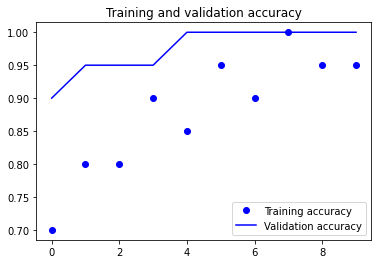

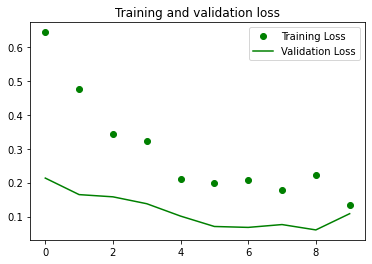

In [65]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Test_4 데이터 증강

https://www.tensorflow.org/tutorials/images/data_augmentation?hl=ko

https://codetorial.net/tensorflow/image_augmentation.html

https://codetorial.net/tensorflow/transfer_learning.html

In [66]:
#
! git clone https://github.com/mckang6113875/AP_Test_OPEN.git

fatal: destination path 'AP_Test_OPEN' already exists and is not an empty directory.


In [67]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
  -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-05-23 09:57:06--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 142.250.157.128, 142.251.8.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   266MB/s    in 0.3s    

2022-05-23 09:57:07 (266 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [68]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                              include_top=False,
                              weights=None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_97 (Conv2D)             (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 74, 74, 32)  96          ['conv2d_97[0][0]']              
 ormalization)                                                                                    
                                                                                       

In [69]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [70]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(optimizer=RMSprop(lr=0.0001),
            loss='binary_crossentropy',
            metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:138: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


## CORE

In [71]:
# 6113875
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define our example directories and files
base_dir = '/content/AP_Test_OPEN/SVM'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_distorted_dir = os.path.join(train_dir, 'distorted')
train_undistorted_dir = os.path.join(train_dir, 'undistorted')
validation_distorted_dir = os.path.join(validation_dir, 'distorted')
validation_undistorted_dir = os.path.join(validation_dir, 'undistorted')

train_distorted_fnames = os.listdir(train_distorted_dir)
train_undistorted_fnames = os.listdir(train_undistorted_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255.,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255.)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                      batch_size=20,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [72]:
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  steps_per_epoch=1, #Kang, steps_per_epoch = len()//batch_size
  epochs=10,
  validation_steps=1,
  verbose=2
)

Epoch 1/10
1/1 - 17s - loss: 0.7114 - accuracy: 0.4500 - val_loss: 0.5331 - val_accuracy: 0.7500 - 17s/epoch - 17s/step
Epoch 2/10
1/1 - 6s - loss: 0.6740 - accuracy: 0.6500 - val_loss: 3.4614 - val_accuracy: 0.5000 - 6s/epoch - 6s/step
Epoch 3/10
1/1 - 3s - loss: 3.2975 - accuracy: 0.5000 - val_loss: 1.3329 - val_accuracy: 0.5500 - 3s/epoch - 3s/step
Epoch 4/10
1/1 - 3s - loss: 1.1734 - accuracy: 0.5000 - val_loss: 1.0073 - val_accuracy: 0.5000 - 3s/epoch - 3s/step
Epoch 5/10
1/1 - 3s - loss: 1.3274 - accuracy: 0.5000 - val_loss: 0.7551 - val_accuracy: 0.6500 - 3s/epoch - 3s/step
Epoch 6/10
1/1 - 3s - loss: 0.6531 - accuracy: 0.6000 - val_loss: 0.4855 - val_accuracy: 0.8000 - 3s/epoch - 3s/step
Epoch 7/10
1/1 - 3s - loss: 0.7849 - accuracy: 0.6000 - val_loss: 0.6398 - val_accuracy: 0.7000 - 3s/epoch - 3s/step
Epoch 8/10
1/1 - 3s - loss: 0.6188 - accuracy: 0.6500 - val_loss: 0.3792 - val_accuracy: 0.8500 - 3s/epoch - 3s/step
Epoch 9/10
1/1 - 3s - loss: 0.4217 - accuracy: 0.7500 - val_l

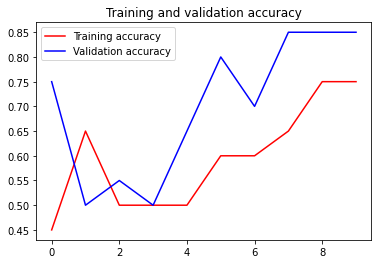

<Figure size 432x288 with 0 Axes>

In [73]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()